In [1]:
import cv2
!pip install PyMuPDF
import fitz
import keras
import PIL
import numpy as np
from keras import layers
from IPython.display import Image, display
!sudo apt-get install libzbar0
!pip install pyzbar
!pip install pyzbar[scripts]
from pyzbar.pyzbar import decode

     |████████████████████████████████| 8.8 MB 8.4 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 193 kB of archives.
After this operation, 760 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4lconvert0 amd64 1.14.2-1 [76.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4l-0 amd64 1.14.2-1 [41.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libzbar0 amd64 0.10+doc-10.1build2 [75.7 kB]
Fetched 193 kB in 1s (190 kB/s)
debconf: unable to initializ

In [2]:
def pix2np(pix):
    im = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.h, pix.w, pix.n)
    im = np.ascontiguousarray(im[...])  # rgb to bgr
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    return im

%matplotlib inline 

# Full transformation

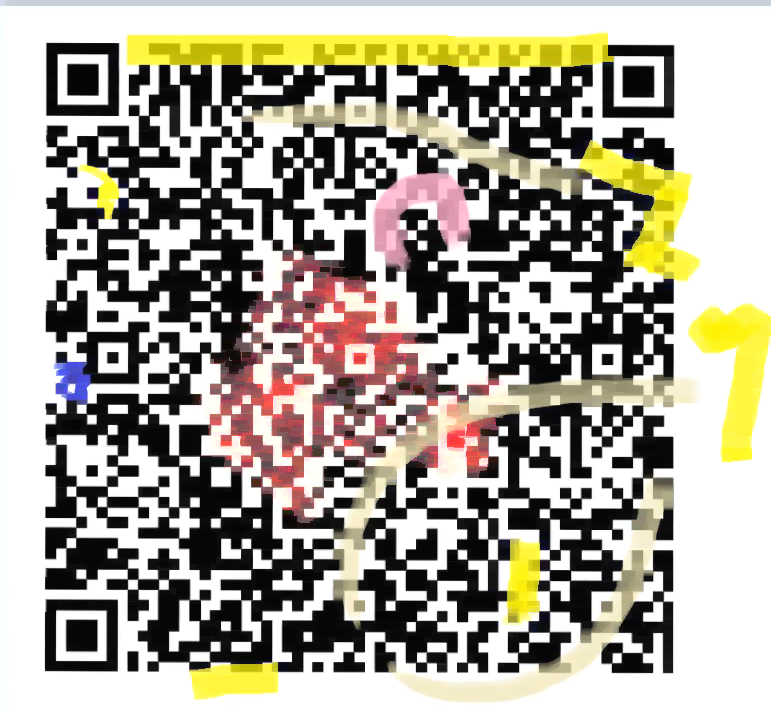

In [52]:
import math
pdf = fitz.open('test-robust.pdf')
pix = fitz.Pixmap(pdf, pdf.get_page_images(0)[0][0])  
image = pix2np(pix)
image = cv2.resize(image,(image.shape[1]//1,image.shape[0]//1))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,2))
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=4) 
cv2.imwrite(f'file1.png',image)
display(Image('file1.png'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


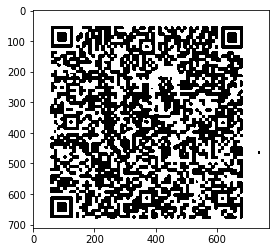

eyJpdiI6ImR4eC9pVEV1WERRMlZYaGxyOE5rMVE9PSIsInZhbHVlIjoidnlIMmRZam9sbG9QUmlaWmdua2hJWG5kdHBSdDZXdWc4d3FkKy95d0U5OXZIM2QrWUt2ZDVlRjEraHEyRDlQRGlldW01VWZKaEhncTZ0Z3NuV2hTdW84S2dMaFNJVFc4eFRqYzJlclk0dnM9IiwibWFjIjoiYmY3YWZiYmM1NDU1MDk5YWFkYWY2MDY4OTA4MDZlNmQ3NDJkZWYyMjFmNzFhOGQwNDQ4MzJmNjAxYzJlMzExZCJ9


In [3]:
import math
pdf = fitz.open('test-robust.pdf')
pix = fitz.Pixmap(pdf, pdf.get_page_images(0)[0][0])  
image = pix2np(pix)
image = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2HSV),(image.shape[1]//1,image.shape[0]//1))
kernel = np.array([[0, 0, 0],
                [0, 1, 0],
                [0, 0, 0]])
image = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

cross_kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
image = cv2.threshold(image,200,255,cv2.THRESH_BINARY)[1]
image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
image = cv2.threshold(image,200,255,cv2.THRESH_BINARY)[1]
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, cross_kernel)
kernel = np.array([[0, -2, 0],
                [-2, 12, -2],
                [0, -2, 0]])
image = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=4) 
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=4) 
image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=4) 
image = cv2.threshold(image, 192, 255, cv2.THRESH_BINARY)[1]
kernel = np.array([[-1, -1, -1],
                [-1, 30, -1],
                [-1, -1, -1]])
image = cv2.filter2D(src=image, ddepth=5, kernel=kernel)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
"""cv2.imwrite(f'file1.png',image)
display(Image('file1.png'))

img = cv2.imread("file1.png")
"""
from matplotlib import pyplot as plt
plt.imshow(image, interpolation='nearest')
plt.show()
res = decode(image)[0].data.decode('utf8')
print(res)